In [1]:
import numpy as np
import csv
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm, colors

np.set_printoptions(linewidth=270, precision=4)

In [2]:
# paste your csv data here to replace the existing one


csv_data = """
0,5,4,1,3,3,1,1,2,1,3,5,5,1,2,2,2,4,2,5,3,1,2,1,1
4,0,3,2,4,4,4,3,2,1,5,5,5,4,2,3,3,4,2,5,3,1,3,2,1
3,2,0,1,1,5,3,3,1,1,1,2,5,2,2,2,1,3,1,5,1,1,1,1,1
2,3,1,0,2,4,1,1,2,1,1,2,1,1,3,1,1,1,1,2,1,1,2,1,1
3,5,3,1,0,4,3,3,2,1,3,5,4,2,4,4,2,4,2,5,1,1,1,1,1
1,1,3,1,1,0,5,1,1,1,1,2,4,4,4,2,1,5,3,1,2,1,1,2,1
1,1,3,1,2,5,0,3,1,5,1,5,4,5,4,3,2,4,2,2,1,1,1,1,1
1,1,1,1,1,1,1,0,1,1,1,1,5,2,2,1,1,3,1,2,1,1,1,1,1
1,2,1,1,2,2,3,1,0,1,1,1,4,1,5,2,2,3,3,1,4,4,5,4,4
1,1,1,1,1,4,5,1,1,0,1,1,5,5,4,3,2,4,3,1,2,2,1,1,1
4,5,3,1,3,5,4,4,1,1,0,5,4,4,1,2,1,5,2,5,2,1,1,1,1
3,5,3,1,3,5,5,4,1,1,5,0,5,2,4,1,2,4,2,5,1,1,1,1,1
2,2,4,2,2,5,4,4,2,1,2,3,0,5,5,2,3,5,2,1,2,1,1,1,1
1,4,1,1,2,3,5,1,1,5,1,1,5,0,2,4,4,5,3,2,2,5,1,3,1
1,1,1,3,2,3,3,1,1,1,1,1,5,1,0,1,1,4,3,1,1,2,1,2,3
3,3,1,1,3,2,2,1,1,2,1,2,4,4,2,0,5,3,4,1,5,5,2,4,4
1,3,1,1,2,2,3,1,1,1,1,1,4,4,2,5,0,3,4,1,5,5,4,4,5
3,4,4,1,3,5,5,4,3,4,3,3,5,5,4,2,3,0,2,1,2,1,3,2,1
2,1,1,1,3,2,3,1,3,2,1,2,3,2,2,5,2,1,0,1,4,5,3,4,3
2,1,3,1,2,4,2,5,3,1,4,5,5,5,4,3,2,4,2,0,1,1,1,2,1
3,5,1,1,3,2,3,1,4,1,1,1,4,4,4,5,5,3,4,1,0,5,4,5,4
1,2,1,1,2,2,3,2,3,3,1,1,4,5,4,4,4,2,5,2,4,0,3,5,4
2,3,1,1,3,2,1,1,5,1,2,1,4,1,3,4,3,3,4,1,5,3,0,4,3
1,3,1,1,2,2,3,1,4,3,1,2,4,4,1,3,4,3,5,2,3,5,3,0,4
1,1,1,1,1,2,3,1,5,1,1,1,3,2,5,3,4,3,5,1,3,5,3,4,0
"""

In [3]:
csv_data = csv_data.strip("\n")

data = np.array(list(csv.reader(csv_data.split("\n"))), dtype=int)

N = data.shape[0]

In [4]:
# if available, you can specify a list of genders here, or just leave it as `None`

gender = [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1]

# gender = None

In [5]:
# convert the table-data to a symmetric adjacency matrix to :
A = 0.5 * (data + data.T)

avg = np.average(A, axis=0)

A2 = A*1
A2[A2<=3] *= 0.1
G = nx.Graph(A2)

In [6]:
connections = []
edge_weights = []
edge_colors = []
line_widths = []

for i, j in G.edges:
    a = np.round(A[i, j], 4)/5
    edge_colors.append(cm.PuBu(a, alpha=a))
    line_widths.append(a*5)
    
node_labels = dict([ (i, i+1) for i in range(A.shape[0])])


# gender colors (orange and green)
gc = ["#EC8C0E", "#20970B"]

if gender is not None:
    node_colors =[gc[gender[i]] for i in range(A.shape[0])]

else:
    node_colors =gc[0]

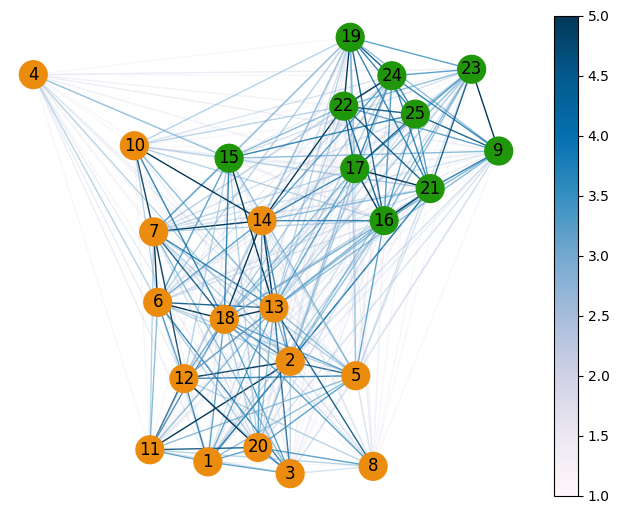

In [7]:
pos = nx.spring_layout(G, seed=10)
nx.draw(G, pos, node_size=400, edge_color=edge_colors, width=1, labels=node_labels, node_color=node_colors)

normalizer = colors.Normalize(1, 5)
plt.colorbar(cm.ScalarMappable(norm=normalizer, cmap=cm.PuBu))
plt.show()